In [76]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from collections import defaultdict
%matplotlib inline 

In [77]:
#read in csv file with data
df=pd.read_csv('cpl data/all_matches.csv')

#manually change start date to correct type as parse_dates=True didn't work. 
df['start_date'] = pd.to_datetime(df['start_date'])

In [78]:
#Sort data (ball by ball) from first season to last season (in chronological order)
sorted_data = df.sort_values(by=['start_date', 'innings', 'ball'])
df = sorted_data

In [79]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
46113,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.1,Barbados Tridents,St Lucia Zouks,DR Smith,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,caught,DR Smith,NaN,NaN
46114,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.2,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46115,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.3,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46116,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.4,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46117,635215,2013,2013-07-30,"Kensington Oval, Bridgetown",1,0.5,Barbados Tridents,St Lucia Zouks,Shoaib Malik,JL Carter,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
72131,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.4,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72132,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.5,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72133,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.6,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72134,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,15.7,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72135,1323177,2022,2022-09-30,"Providence Stadium, Guyana",2,16.1,Jamaica Tallawahs,Barbados Royals,BA King,R Powell,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72136 entries, 46113 to 72135
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   match_id                72136 non-null  int64         
 1   season                  72136 non-null  int64         
 2   start_date              72136 non-null  datetime64[ns]
 3   venue                   72136 non-null  object        
 4   innings                 72136 non-null  int64         
 5   ball                    72136 non-null  float64       
 6   batting_team            72136 non-null  object        
 7   bowling_team            72136 non-null  object        
 8   striker                 72136 non-null  object        
 9   non_striker             72136 non-null  object        
 10  bowler                  72136 non-null  object        
 11  runs_off_bat            72136 non-null  int64         
 12  extras                  72136 non-null  in

In [82]:
df.size

1586992

In [83]:
df.shape

(72136, 22)

In [84]:
df.dtypes

match_id                           int64
season                             int64
start_date                datetime64[ns]
venue                             object
innings                            int64
ball                             float64
batting_team                      object
bowling_team                      object
striker                           object
non_striker                       object
bowler                            object
runs_off_bat                       int64
extras                             int64
wides                            float64
noballs                          float64
byes                             float64
legbyes                          float64
penalty                          float64
wicket_type                       object
player_dismissed                  object
other_wicket_type                float64
other_player_dismissed           float64
dtype: object

In [85]:
#Add a column for overs:
df['overs'] = np.floor(df['ball']) + 1

#Add a column for keeping track of runs per ball
df['runs_per_ball'] = df['extras'] + df['runs_off_bat']

In [86]:
#Fix all columns with some non-null values: 

#wides, no balls, byes, legbyes, penalty : if Null => 0 else 1 
#wicket_type: if Null => No wicket 
#player_dismissed: if Null => No dismissal
df = df.fillna({'wides':0.0, 'noballs':0.0, 'byes':0.0, 'legbyes':0.0,
                'penalty':0.0, 'wicket_type':'No wicket', 'player_dismissed':'No dismissal'})

In [87]:
#Drop columns with only null values:
df = df.dropna(axis=1)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72136 entries, 46113 to 72135
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   match_id          72136 non-null  int64         
 1   season            72136 non-null  int64         
 2   start_date        72136 non-null  datetime64[ns]
 3   venue             72136 non-null  object        
 4   innings           72136 non-null  int64         
 5   ball              72136 non-null  float64       
 6   batting_team      72136 non-null  object        
 7   bowling_team      72136 non-null  object        
 8   striker           72136 non-null  object        
 9   non_striker       72136 non-null  object        
 10  bowler            72136 non-null  object        
 11  runs_off_bat      72136 non-null  int64         
 12  extras            72136 non-null  int64         
 13  wides             72136 non-null  float64       
 14  noballs           

In [ ]:
#Alter non-null values

In [89]:
#Change venues to include country and also to remove duplicate values
#eg: Providence Stadium and Providence Stadium, Guyana
df = df.replace('Providence Stadium', 'Providence Stadium, Guyana')
df = df.replace("Queen's Park Oval, Port of Spain", "Queen's Park Oval, Port of Spain, Trinidad")
df = df.replace('Warner Park, Basseterre', 'Warner Park, Basseterre, St Kitts')
df = df.replace('Sabina Park, Kingston',  'Sabina Park, Kingston, Jamaica')
df = df.replace('Central Broward Regional Park Stadium Turf Ground', 
                'Central Broward Regional Park Stadium Turf Ground, USA')
df = df.replace('Daren Sammy National Cricket Stadium, Gros Islet',
                'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia')
df = df.replace('Brian Lara Stadium, Tarouba', 'Brian Lara Stadium, Tarouba, Trinidad')
df = df.replace('Sir Vivian Richards Stadium, North Sound', 'Sir Vivian Richards Stadium, North Sound, Antigua')
df = df.replace("National Cricket Stadium, St George's", "National Cricket Stadium, St George's, Grenada")

In [ ]:
#Broad Analysis

In [90]:
#List of Seasons: 
df['season'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [91]:
#List of Venues: 
df['venue'].unique()

array(['Kensington Oval, Bridgetown', 'Providence Stadium, Guyana',
       'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
       "Queen's Park Oval, Port of Spain, Trinidad",
       'Sir Vivian Richards Stadium, North Sound, Antigua',
       'Sabina Park, Kingston, Jamaica',
       "National Cricket Stadium, St George's, Grenada",
       'Warner Park, Basseterre, St Kitts',
       'Central Broward Regional Park Stadium Turf Ground, USA',
       'Brian Lara Stadium, Tarouba, Trinidad'], dtype=object)

In [92]:
#List of ALL Teams (Not Franchises): 
df['batting_team'].unique()

array(['Barbados Tridents', 'St Lucia Zouks', 'Guyana Amazon Warriors',
       'Trinidad & Tobago Red Steel', 'Antigua Hawksbills',
       'Jamaica Tallawahs', 'St Kitts and Nevis Patriots',
       'Trinbago Knight Riders', 'St Lucia Stars', 'Barbados Royals',
       'St Lucia Kings'], dtype=object)

In [93]:
#Change all Franchise names as indicated above:
df = df.replace('Trinidad & Tobago Red Steel', 'Trinbago Knight Riders')
df = df.replace("Barbados Tridents", "Barbados Royals")
df = df.replace('St Lucia Zouks', 'St Lucia Kings')
df = df.replace('St Lucia Stars', 'St Lucia Kings')

In [94]:
#List of All Franchises: 
df['batting_team'].unique()

array(['Barbados Royals', 'St Lucia Kings', 'Guyana Amazon Warriors',
       'Trinbago Knight Riders', 'Antigua Hawksbills',
       'Jamaica Tallawahs', 'St Kitts and Nevis Patriots'], dtype=object)

In [95]:
# First ball of CPL history:
df.iloc[0]

match_id                                 635215
season                                     2013
start_date                  2013-07-30 00:00:00
venue               Kensington Oval, Bridgetown
innings                                       1
ball                                        0.1
batting_team                    Barbados Royals
bowling_team                     St Lucia Kings
striker                                DR Smith
non_striker                           JL Carter
bowler                                JA Morkel
runs_off_bat                                  0
extras                                        0
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     0.0
penalty                                     0.0
wicket_type                              caught
player_dismissed                       DR Smith
overs                                   

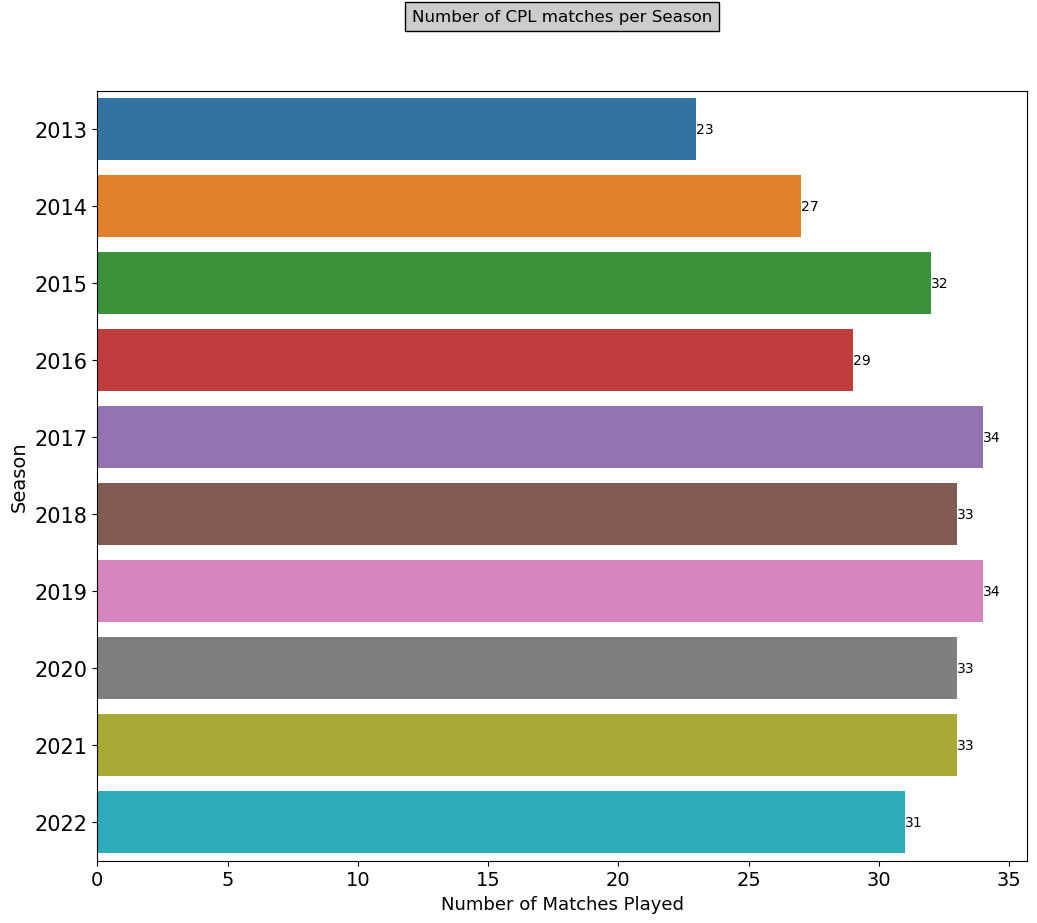

In [96]:
#Bar Chart showing Number of CPL matches played, in each season:

#Plot size
plt.figure(figsize=(12,10))

#Group by the match id and season columns
data = df.groupby(['match_id','season'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

#Sort from 2013 - 2022
data = data.sort_index()

plt.title("Number of CPL matches per Season", bbox={'facecolor':'0.8', 'pad':5}, fontsize=12, y =1.0)

bar_chart = sns.barplot(y=data.index,x=data, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

#Label Axes
plt.xlabel('Number of Matches Played', fontsize = 13)
plt.ylabel('Season', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# displaying chart
plt.show()

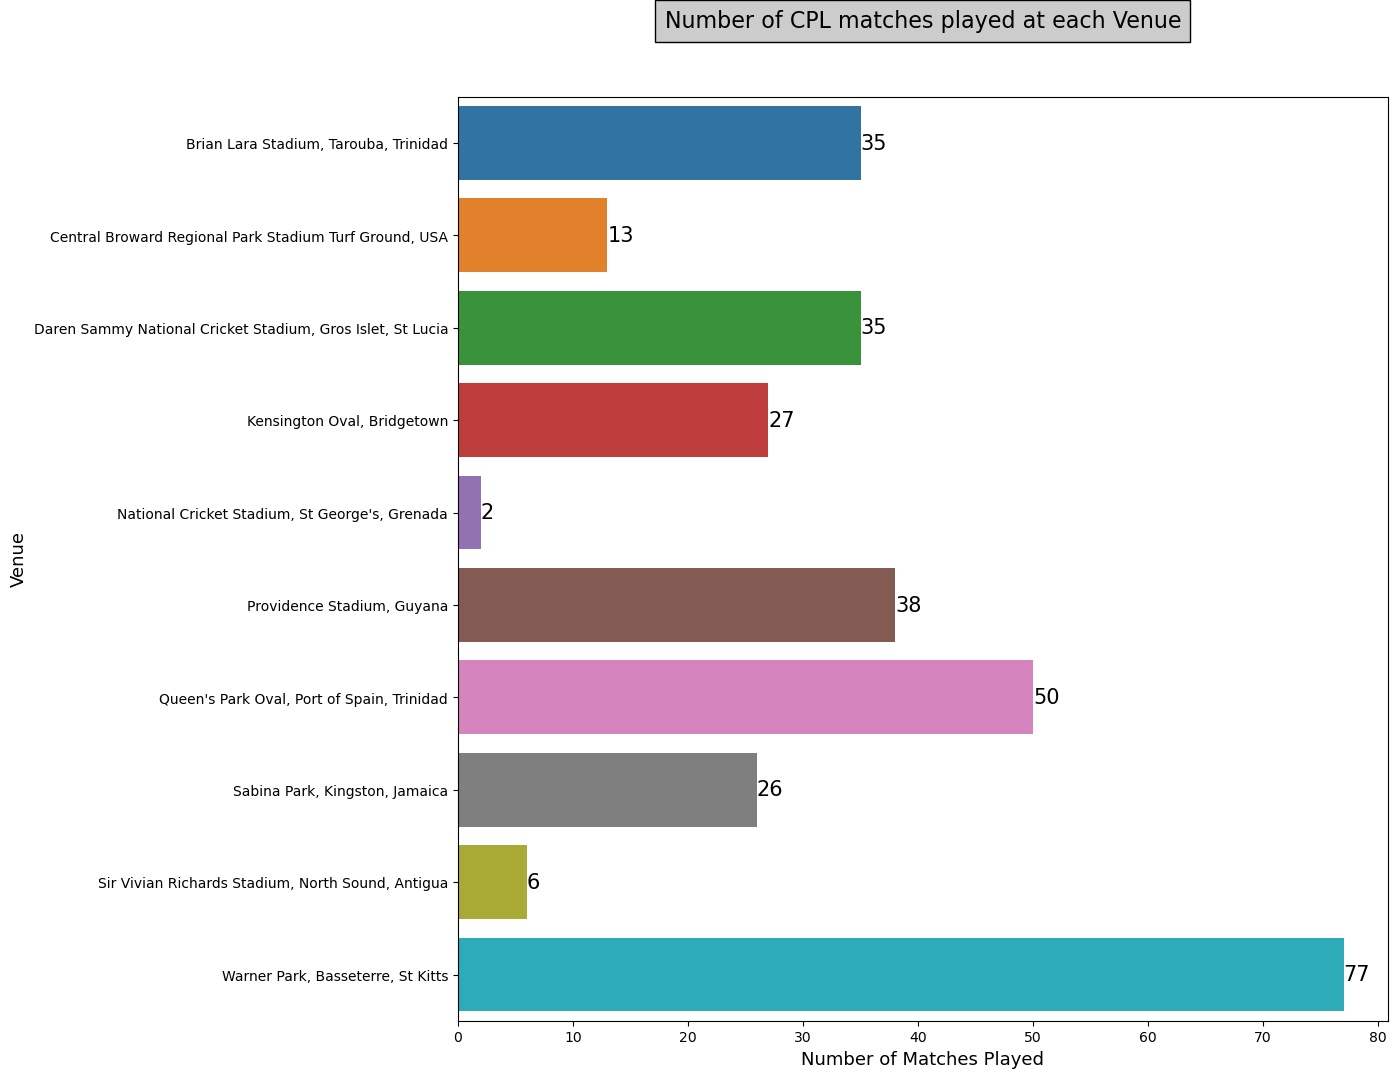

In [97]:
#Bar Chart showing Number of CPL matches played, at each Venue:

#Plot size
plt.figure(figsize=(12,12))

#Group by the match id and season columns
data = df.groupby(['match_id','venue'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

#Sort from 2013 - 2022
data = data.sort_index()

plt.title("Number of CPL matches played at each Venue", bbox={'facecolor':'0.8', 'pad':5}, fontsize=16, y = 1.0)
rcParams['axes.titlepad'] = 50

bar_chart1 = sns.barplot(y=data.index,x=data)

#Label each bar 
bar_chart1.bar_label(bar_chart1.containers[0], fontsize=15)

#Label Axes
plt.xlabel('Number of Matches Played', fontsize=13)
plt.ylabel('Venue', fontsize=13)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=15)

# displaying chart
plt.show()

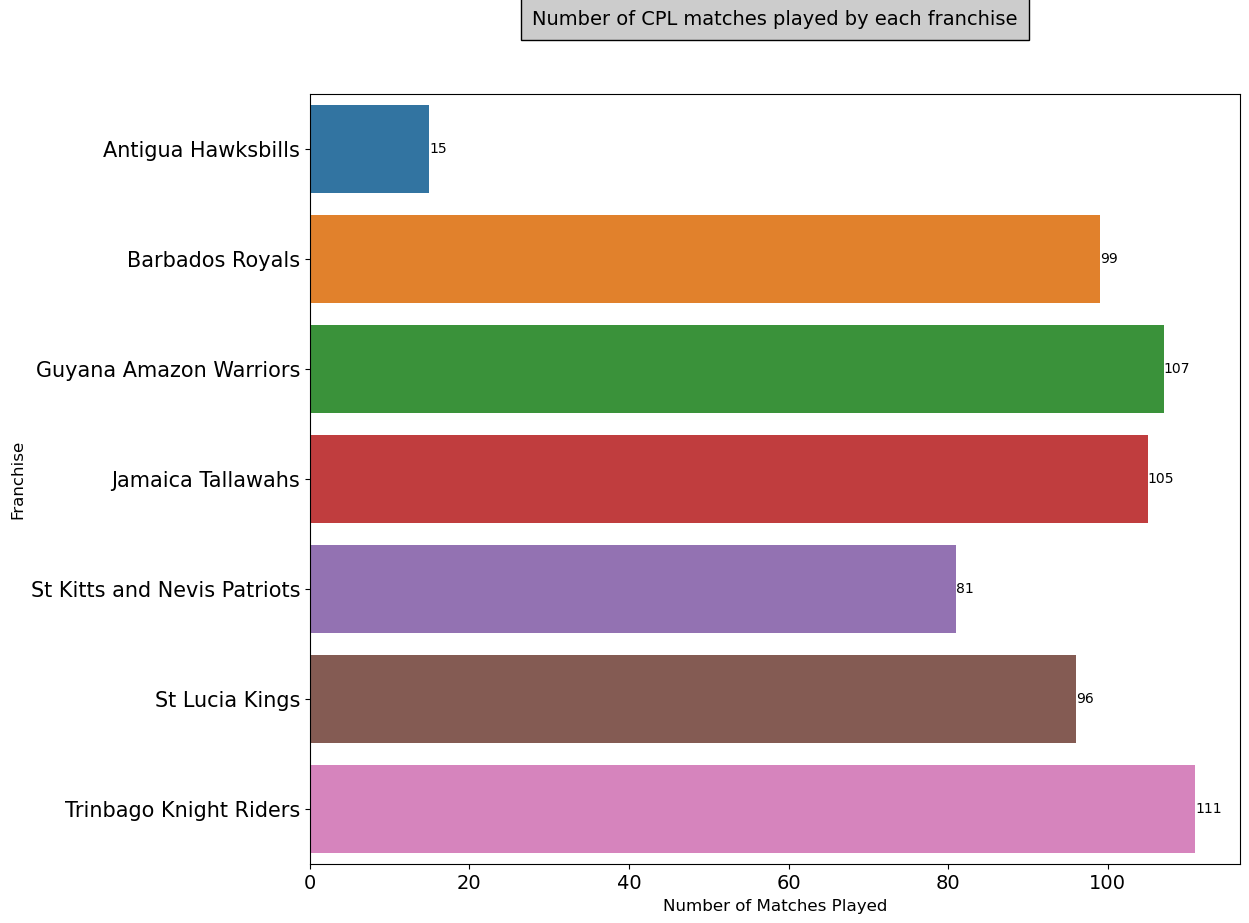

In [98]:
#Bar Chart showing Number of CPL matches played, by each Franchise:

#Plot size
plt.figure(figsize=(12,10))

#Group by the match id and season columns
data = df.groupby(['match_id','batting_team'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

#Sort from 2013 - 2022
data = data.sort_index()

plt.title("Number of CPL matches played by each franchise", bbox={'facecolor':'0.8', 'pad':7}, fontsize=14)

bar_chart2 = sns.barplot(y=data.index,x=data, orient='h')

bar_chart2.bar_label(bar_chart2.containers[0])

#Label Axes
plt.xlabel('Number of Matches Played', fontsize=12)
plt.ylabel('Franchise', fontsize=12)

plt.show()

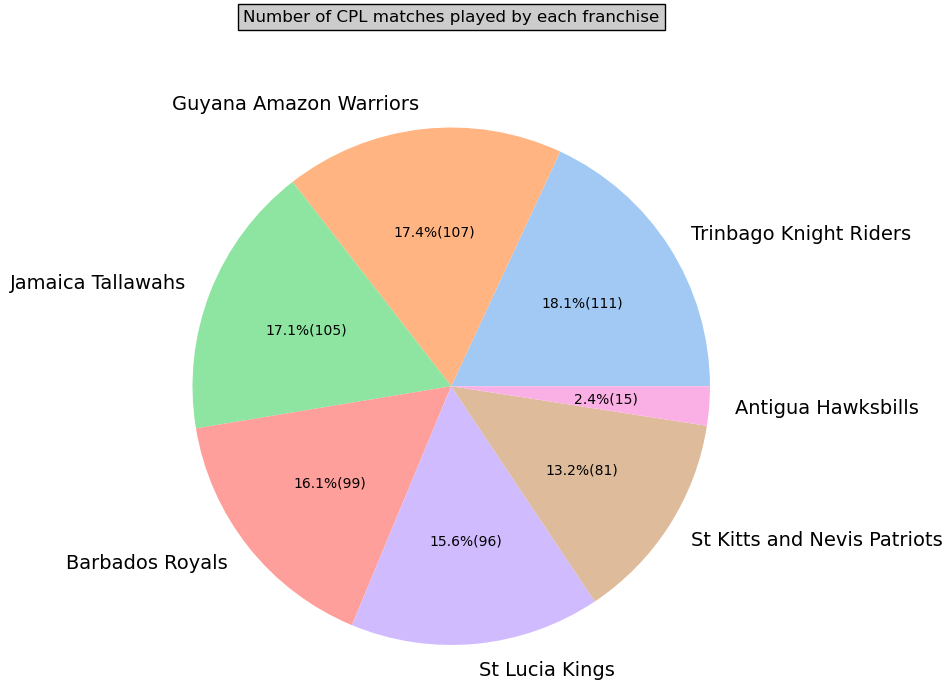

In [99]:
#Pie Chart showing Number of CPL matches played by each franchise:

#Group by the match id and team columns
data = df.groupby(['match_id','batting_team'])

#Count the data and drop the match_id 
data = data.count().index.droplevel(level=0).value_counts()

plt.title("Number of CPL matches played by each franchise", bbox={'facecolor':'0.8'}, y = 1.3, fontsize=12)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
piechart2 = plt.pie(data, labels=data.index, colors=palette_color, \
        autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*data.sum()), radius = 1.75)
  
# displaying chart
plt.show()

In [ ]:
#CPL BATTING ANALYSIS

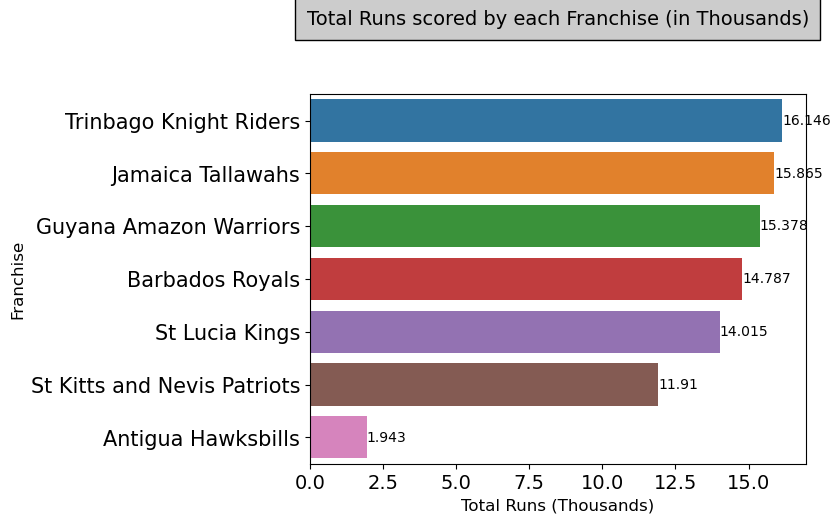

In [100]:
#Total Runs Scored by each Franchise

#Get max runs for each team: sum of runs of the bat and the extras
team_runs = (df.groupby(['batting_team'])['runs_off_bat'].sum() + df.groupby(['batting_team'])['extras'].sum())/1000

#Sort the data in descending order; i.e. most runs first
team_runs = team_runs.sort_values(ascending=False)

plt.title("Total Runs scored by each Franchise (in Thousands)", bbox={'facecolor':'0.8', 'pad':7}, fontsize=14)

bar_chart3 = sns.barplot(y=team_runs.index,x=team_runs, orient='h')

bar_chart3.bar_label(bar_chart3.containers[0])

#Label Axes
plt.xlabel('Total Runs (Thousands)', fontsize=12)
plt.ylabel('Franchise', fontsize=12)

plt.show()

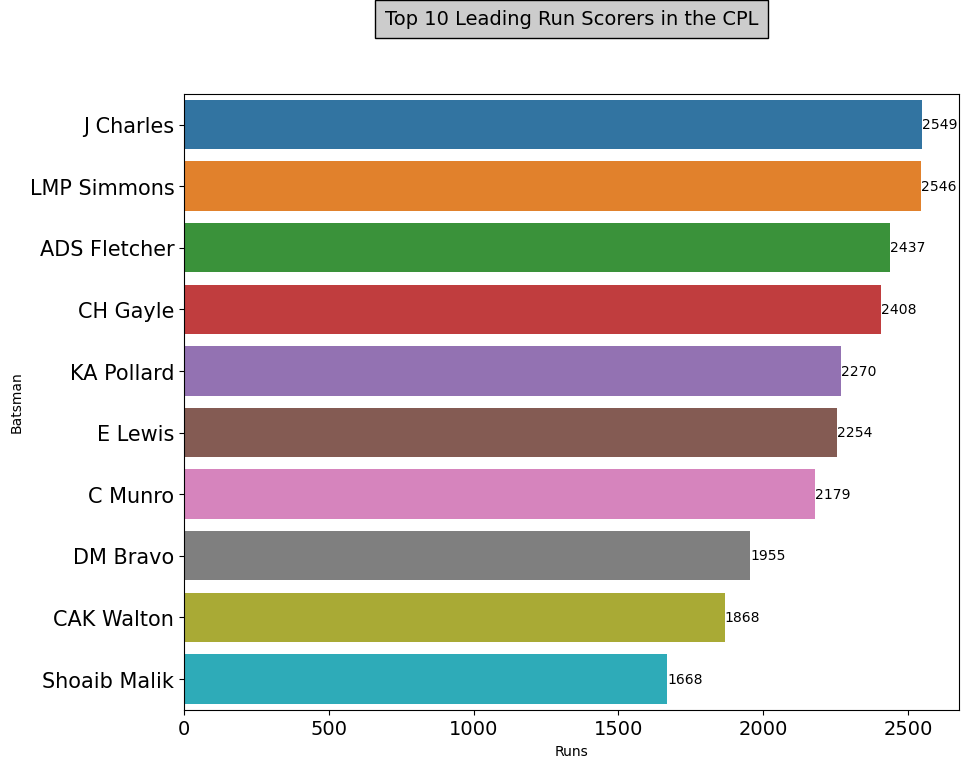

In [101]:
#Top 10 Leading Run Scorers in the CPL
plt.figure(figsize=(10,8))

#Group by runs off the bat
batsman_runs = df.groupby(['striker'])['runs_off_bat'].sum()

#sort in descending order 
batsman_runs = batsman_runs.sort_values(ascending=False)[:10]


plt.title("Top 10 Leading Run Scorers in the CPL", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart4 = sns.barplot(y=batsman_runs.index,x=batsman_runs,orient='h')

bar_chart4.bar_label(bar_chart4.containers[0])

#Label Axes
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.show()

batting_team
St Lucia Kings                 47.666667
St Kitts and Nevis Patriots    45.913580
Jamaica Tallawahs              44.409524
Trinbago Knight Riders         43.522523
Guyana Amazon Warriors         42.915888
Barbados Royals                42.656566
Antigua Hawksbills             38.800000
dtype: float64


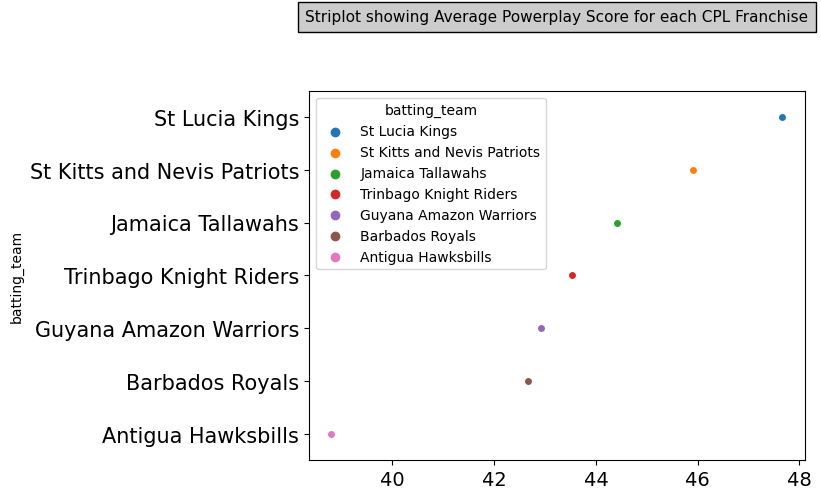

In [102]:
#Produce Average Powerplay runs by each Franchise in a pivot Table

#Get powerplay overs
pp_overs = df[df['overs'] < 7]

#Get runs scored in pp overs
pp_runs = (pp_overs.groupby(['match_id', 'batting_team']).sum()['runs_off_bat'] + 
     pp_overs.groupby(['match_id', 'batting_team']).sum()['extras'])

##Group runs by franchise
pp_runs = pp_runs.groupby('batting_team')

#Get mean pp runs for each franchise and sort in ascending order
avg_pp_runs = pp_runs.mean().sort_values(ascending=False)

plt.title("Striplot showing Average Powerplay Score for each CPL Franchise", bbox={'facecolor':'0.8', 'pad':6}, fontsize=11)

#Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric 
sns.stripplot(y=avg_pp_runs.index ,x=avg_pp_runs, hue=avg_pp_runs.index, data=avg_pp_runs)
print(avg_pp_runs)

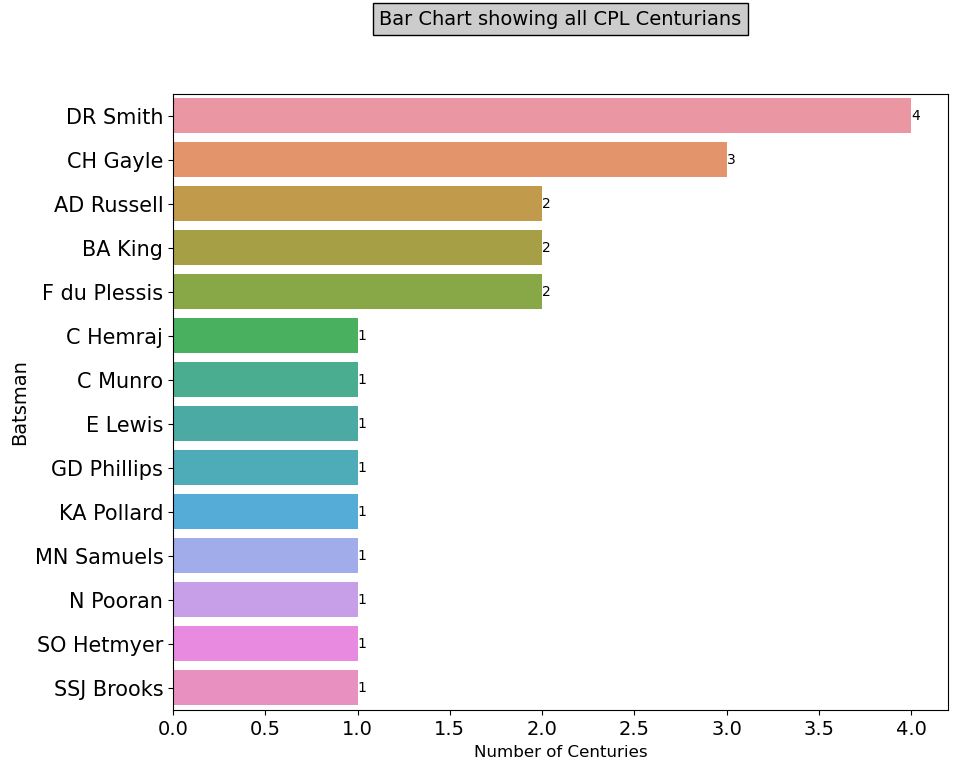

In [103]:
#Plot All CPL century- makers and number of centuries

plt.figure(figsize=(10,8))

#Get groups of batsman and amount of runs in each match
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()
#Filter for centuries
centurians = runs[runs >= 100].droplevel(level=1).groupby('striker')

centurians = centurians.count().sort_values(ascending=False)

plt.title("Bar Chart showing all CPL Centurians", bbox={'facecolor':'0.8', 'pad':4}, fontsize=14)

bar_chart5 = sns.barplot(y=centurians.index,x=centurians,orient='h')

bar_chart5.bar_label(bar_chart5.containers[0])

#Label Axes
plt.xlabel('Number of Centuries', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

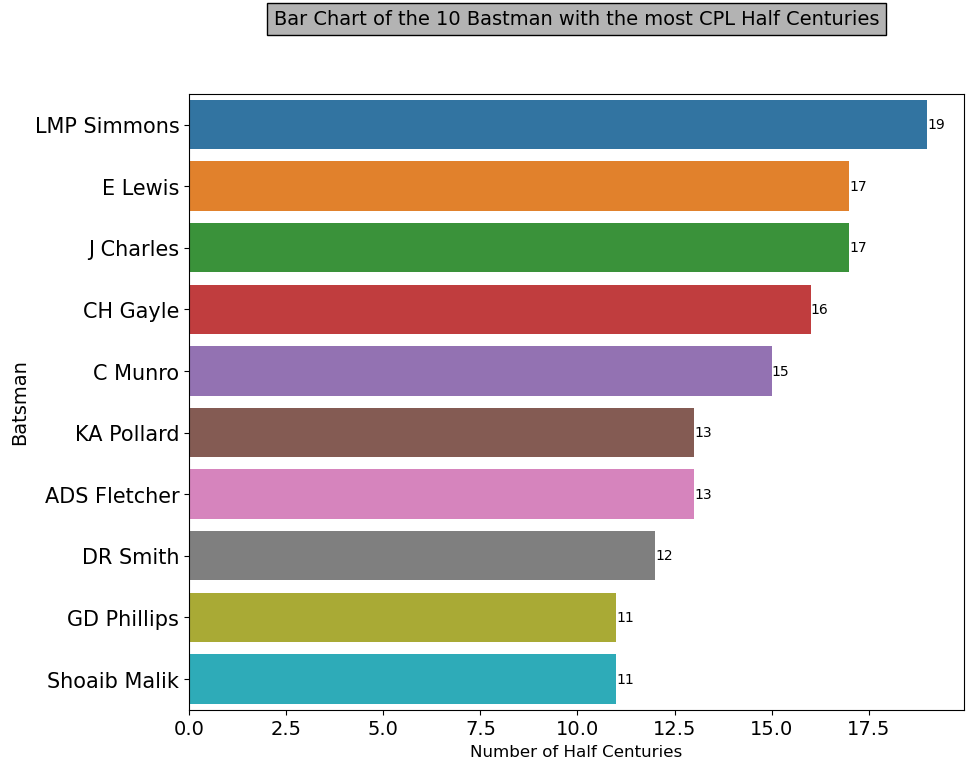

In [104]:
#Plot of the 10 Bastman with most CPL Half Centuries

plt.figure(figsize=(10,8))

#Get groups of batsman and amount of runs in each match
runs = df.groupby(['striker','match_id'])['runs_off_bat'].sum()

#Filter for 50s
half_centurians = runs[runs >= 50].droplevel(level=1).groupby('striker')

half_centurians = half_centurians.count().sort_values(ascending=False)[:10]

plt.title("Bar Chart of the 10 Bastman with the most CPL Half Centuries", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart6 = sns.barplot(y=half_centurians.index,x=half_centurians,orient='h')

bar_chart6.bar_label(bar_chart6.containers[0])

#Label Axes
plt.xlabel('Number of Half Centuries', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

In [105]:
#Batsman with the greatest number of runs each season

#Get runs for each player in every season
sum_data = df.groupby(['season','striker'])['runs_off_bat'].sum()

#Get seasons and max runs per season
season_max_runs = sum_data.groupby('season').max()

print("Batsman with the greatest number of runs each season:\n")
print("{0:10}{1:15}{2:1}".format("Season","Batsman","Runs"))

#traverse the season and runs dict (not really a dict)
#create a dataframe of sum of runs for each player per season
for season,run in season_max_runs.items():
    player = pd.DataFrame(sum_data).loc[season][pd.DataFrame(sum_data).loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t', run)

Batsman with the greatest number of runs each season:

Season    Batsman        Runs
2013 	  LMP Simmons 	 266
2014 	  LMP Simmons 	 414
2015 	  CH Gayle 	 430
2016 	  CH Gayle 	 425
2017 	  CAK Walton 	 458
2018 	  C Munro 	 567
2019 	  BA King 	 496
2020 	  LMP Simmons 	 356
2021 	  RL Chase 	 446
2022 	  BA King 	 422


In [106]:
#List of the Top 10 greatest number runs scored by a single player in a season 

#Get runs for each player in every season
sum_data = df.groupby(['season','striker'])['runs_off_bat'].sum()

#Take top 10 most run scorers from any season
top_ten = sum_data.sort_values(ascending=False)[:10]

print("List of the Top 10 greatest number runs scored by a single player in a season\n")
print(top_ten)


List of the Top 10 greatest number runs scored by a single player in a season

season  striker    
2018    C Munro        567
2019    BA King        496
2017    CAK Walton     458
2018    GD Phillips    457
2021    RL Chase       446
2018    SO Hetmyer     440
2019    LMP Simmons    431
2015    CH Gayle       430
2021    E Lewis        426
2016    CH Gayle       425
Name: runs_off_bat, dtype: int64


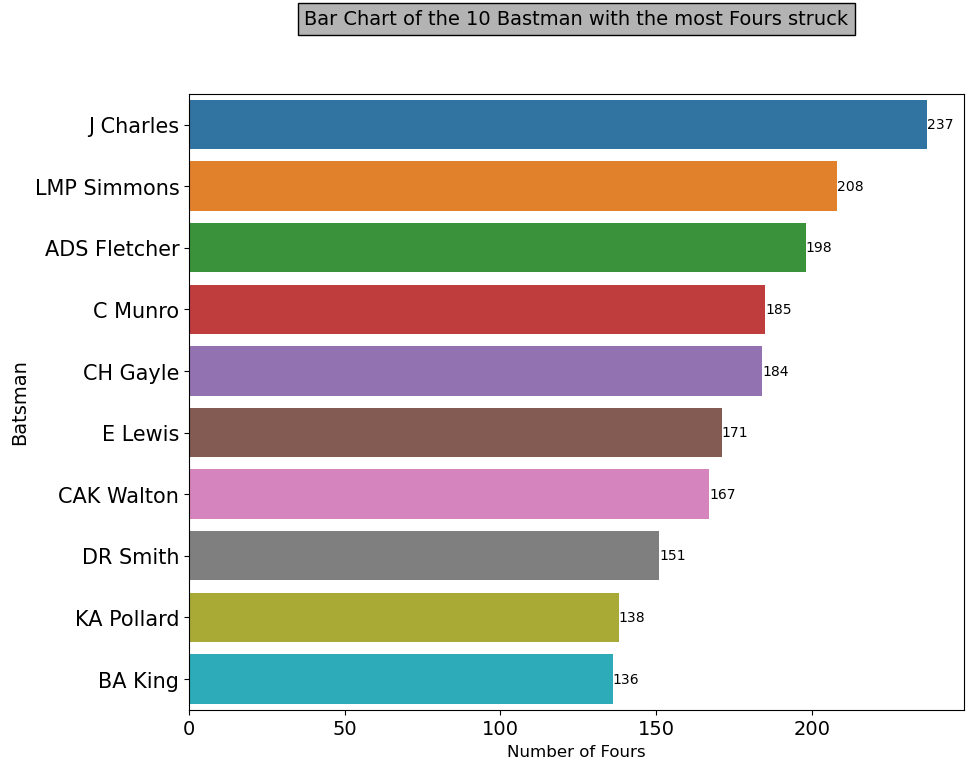

In [107]:
#10 Bastman with the most Fours struck
plt.figure(figsize=(10,8))

four_strikers = df[df['runs_off_bat'] == 4]['striker']

four_strikers = four_strikers.value_counts()[:10]

plt.title("Bar Chart of the 10 Bastman with the most Fours struck", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart7 = sns.barplot(y=four_strikers.index,x=four_strikers,orient='h')

bar_chart7.bar_label(bar_chart7.containers[0])

#Label Axes
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

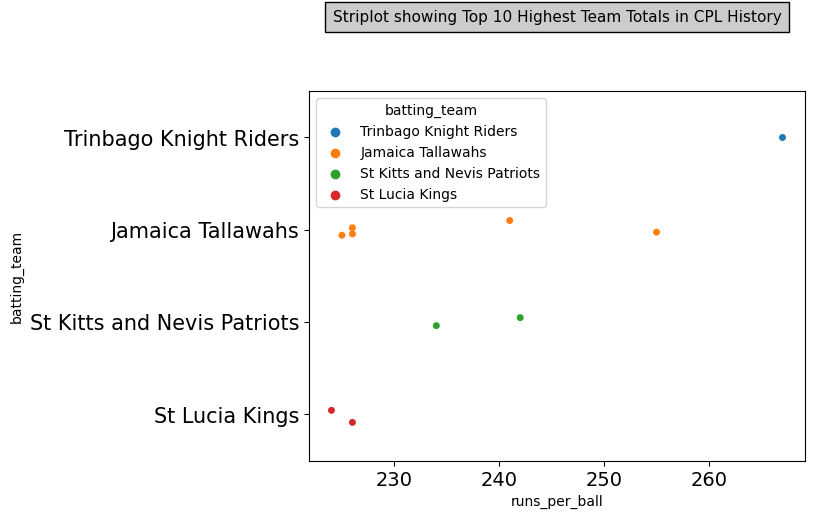

batting_team
Trinbago Knight Riders         267
Jamaica Tallawahs              255
St Kitts and Nevis Patriots    242
Jamaica Tallawahs              241
St Kitts and Nevis Patriots    234
Jamaica Tallawahs              226
St Lucia Kings                 226
Jamaica Tallawahs              226
Jamaica Tallawahs              225
St Lucia Kings                 224
Name: runs_per_ball, dtype: int64


In [108]:
#Top 10 Highest Team Totals in CPL History
#Group data by start dates of matches and teams, i.e. 2 teams per match
team_runs = df.groupby(['start_date','batting_team']).sum()

#Get team totals for every game grouped by match dates
team_total = team_runs['runs_per_ball']

#Drop the match dates but keep the team and it's total score
team_total_scores = team_total.droplevel(level=0)

#Sort and get 10 highest
team_total_top = team_total_scores.sort_values(ascending=False)[:10]

plt.title("Striplot showing Top 10 Highest Team Totals in CPL History", bbox={'facecolor':'0.8', 'pad':6}, fontsize=11)

#Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric 
stripplot2 = sns.stripplot(y=team_total_top.index ,x=team_total_top, hue=team_total_top.index,jitter=True, data=team_total_top)

plt.show()

#print pivot table
print(team_total_top)

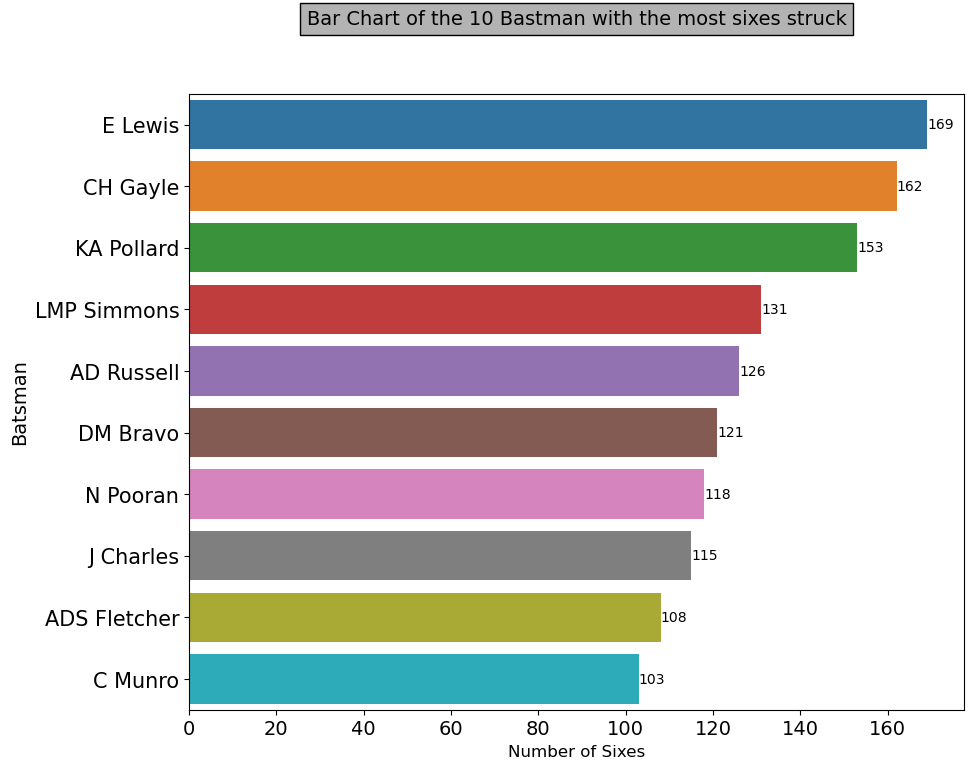

In [109]:
#10 Bastman with the most Sixes struck
plt.figure(figsize=(10,8))

six_strikers = df[df['runs_off_bat'] == 6]['striker']

six_strikers = six_strikers.value_counts()[:10]

plt.title("Bar Chart of the 10 Bastman with the most sixes struck", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart8 = sns.barplot(y=six_strikers.index,x=six_strikers,orient='h')

bar_chart8.bar_label(bar_chart8.containers[0])

#Label Axes
plt.xlabel('Number of Sixes', fontsize=12)
plt.ylabel('Batsman', fontsize=14)
plt.show()

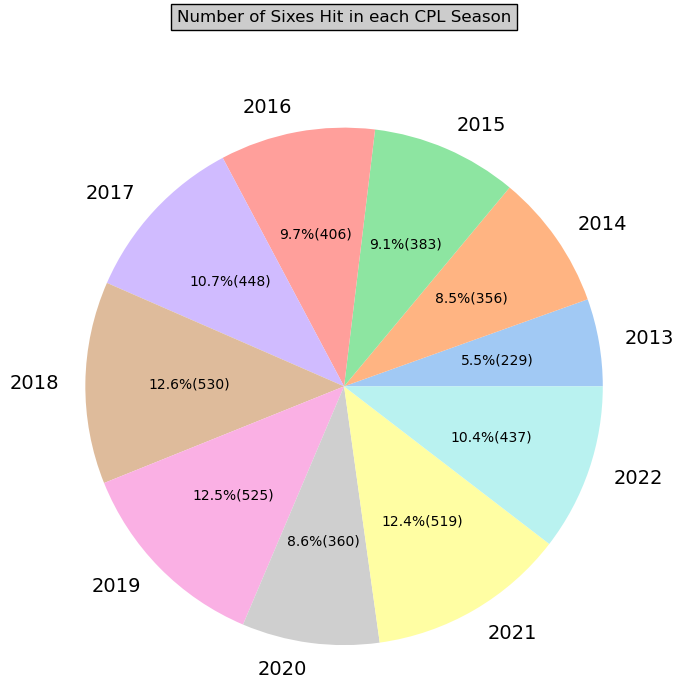

In [110]:
#Pie Chart showing Number of CPL Sixes Hit by Season

#Group by the match id and team columns
data = df[df['runs_off_bat'] == 6].groupby('season')

#Count the data
data = data.count()['match_id']

plt.title("Number of Sixes Hit in each CPL Season", bbox={'facecolor':'0.8'}, y = 1.3)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
piechart1 = plt.pie(data, labels=data.index, colors=palette_color, \
      autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*data.sum()), radius = 1.75)

# displaying chart
plt.show()


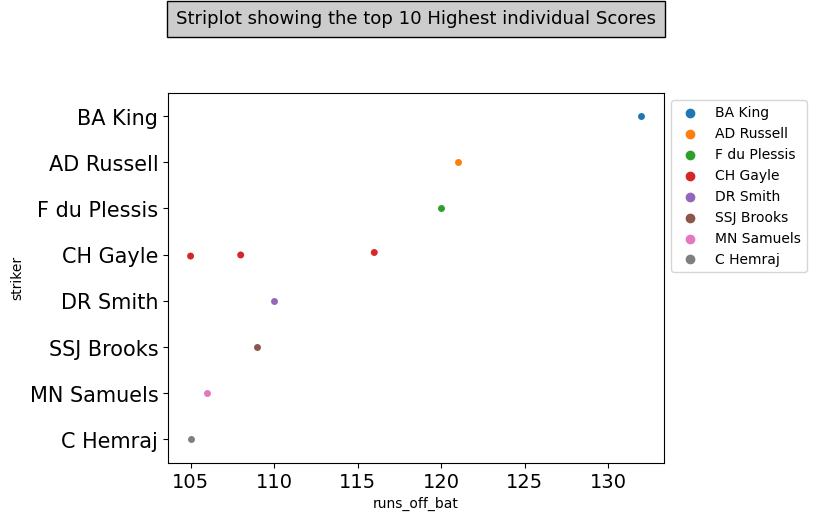

striker       start_date
BA King       2019-10-06    132
AD Russell    2018-08-10    121
F du Plessis  2021-09-04    120
CH Gayle      2019-09-10    116
DR Smith      2014-07-23    110
SSJ Brooks    2022-09-28    109
CH Gayle      2016-07-04    108
MN Samuels    2014-08-07    106
C Hemraj      2021-09-04    105
CH Gayle      2015-07-09    105
Name: runs_off_bat, dtype: int64


In [111]:
#Top 10 Highest individual Scores

#Get runs for each player in every innings in all seasons with dates
batter_date_score = df.groupby(['striker','start_date'])['runs_off_bat'].sum()

#Top 10 highest scores with batsman names and scores and also match dates
top_ten_scores_dates = batter_date_score.sort_values(ascending=False)[:10]

#Take top 10 highest scores with batsman names and scores only
top_ten_score = batter_date_score.sort_values(ascending=False)[:10].droplevel(level=1)

plt.title("Striplot showing the top 10 Highest individual Scores", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

#Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric 
stripplot4 = sns.stripplot(y=top_ten_score.index ,x=top_ten_score, hue=top_ten_score.index,jitter=True, data=top_ten_score)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

#print pivot tables of scores, batsman names and dates
print(top_ten_scores_dates)




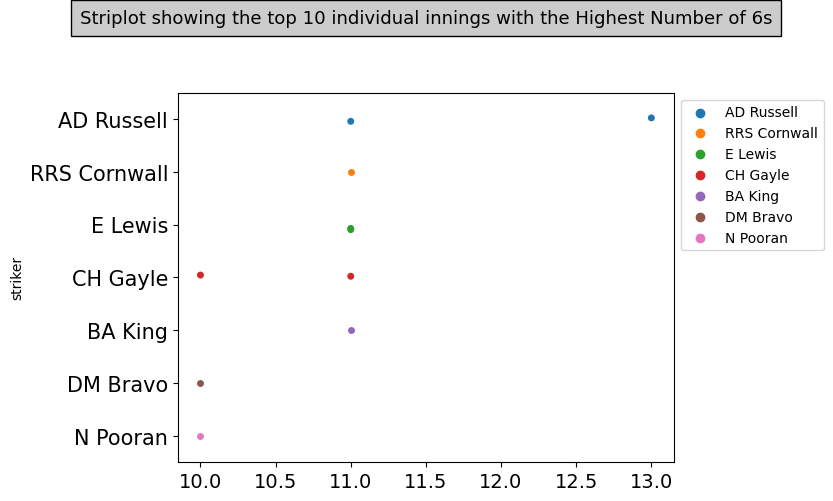

striker
AD Russell      13
RRS Cornwall    11
E Lewis         11
CH Gayle        11
BA King         11
E Lewis         11
AD Russell      11
DM Bravo        10
CH Gayle        10
N Pooran        10
Name: season, dtype: int64


In [112]:
#Top 10 individual innings with the Highest Number of 6s
#Get 6s for each player in every innings in all seasons with dates
six_data = df[df['runs_off_bat'] == 6].groupby(['start_date','striker'])

#Get num 6s hit by each player in every single match: match date: Player: #6s
six_count = six_data.count()['season']

most_sixes = six_count.sort_values(ascending=False).droplevel(level=0)[:10]

plt.title("Striplot showing the top 10 individual innings with the Highest Number of 6s", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

#Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric 
stripplot3 = sns.stripplot(y=most_sixes.index ,x=most_sixes.values, hue=most_sixes.index,jitter=True, data=most_sixes)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

#print pivot table
print(most_sixes)

In [ ]:
#Bowling Data Analysis 

In [113]:
#Leading wicket Takers by Season
#List of dismissals which aren't credited to bowler
no_cred_wickets = 'obstructing the field, retired hurt, No wicket, run out'

#Produce number of wickets for each bowler  in all seasons
bowler_wicket = df[df['wicket_type'].apply(lambda x: True if x not in no_cred_wickets else False)].groupby(['season','bowler'])
bowler_wicket_ct = bowler_wicket.count()['ball']

#sort for each season with highest number of wickets 1st
bowler_wicket_ct_seasonal=bowler_wicket_ct.sort_values(ascending=False)
best_bowler = bowler_wicket_ct_seasonal[:30].sort_index(level=0)
val=-1
lst=[]
max_wicket_taker_dict = {} 
max_wickets_dict = {}
print("Leading wicket Takers by Season with Number of Wickets")
print("{0:10}{1:20}{2:30}".format("Season","Player","Wickets"))

# Traverse best bowler: season:bowler: # wickets
#Keep highest wicket-taker
for (season,bowler),wicket in best_bowler.items():
    if season == val:
        #discard rest of entries below the highest 
        #for a season
        lst.append(wicket)
    else:
        #Create Printed Pivot Table
        print(season,'\t ',bowler,'\t\t',wicket)
        
        #season:best bowler
        max_wicket_taker_dict[season] = bowler
        
        #season:max wickets
        max_wickets_dict[season] = wicket
        val = season
        lst=[]

#Convert to Pandas Series

# #season:best bowler
s = pd.Series(max_wicket_taker_dict)

##season:max wickets
b = pd.Series(max_wickets_dict)


Leading wicket Takers by Season with Number of Wickets
Season    Player              Wickets                       
2013 	  K Santokie 		 16
2014 	  K Santokie 		 16
2015 	  DJ Bravo 		 28
2016 	  DJ Bravo 		 21
2017 	  DJ Bravo 		 16
2018 	  Ali Khan 		 16
2019 	  HR Walsh 		 22
2020 	  Imran Tahir 		 15
2021 	  DC Drakes 		 16
2022 	  AS Joseph 		 18


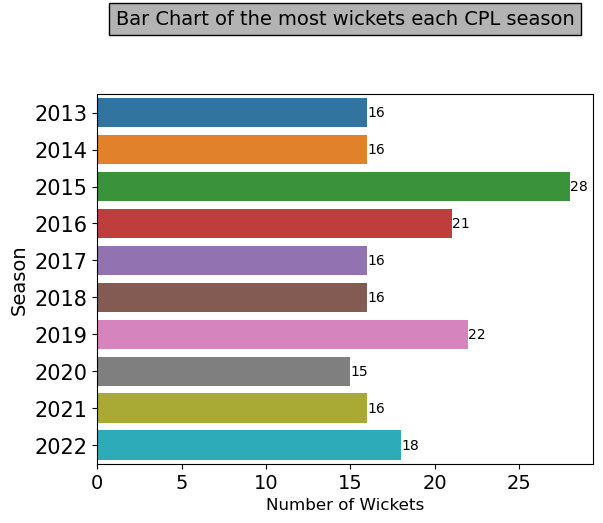

In [114]:
#Bowlers with the most wickets each season (and number of wickets)
#Create a bar chart for max number of wickets each season
plt.title("Bar Chart of the most wickets each CPL season", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart9 = sns.barplot(y=b.index, x=b.values,orient='h')

bar_chart9.bar_label(bar_chart9.containers[0])

#Label Axes
plt.xlabel('Number of Wickets', fontsize=12)
plt.ylabel('Season', fontsize=14)
plt.show()

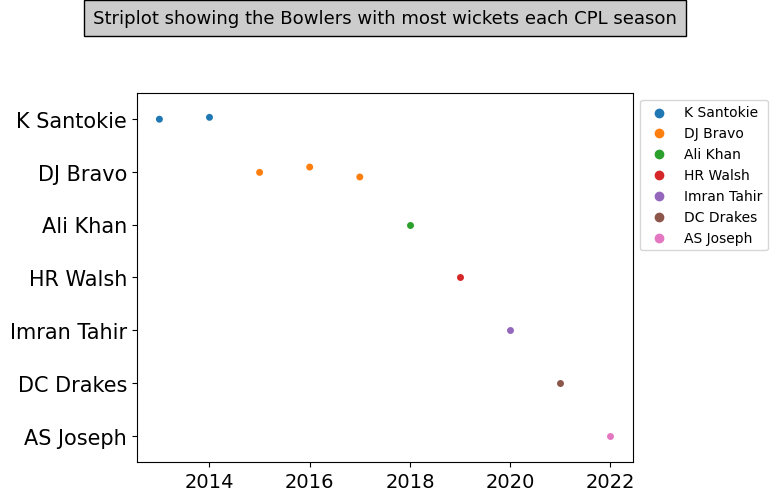

In [115]:
#Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric
#Striplot showing the Bowlers with most wickets each CPL season
plt.title("Striplot showing the Bowlers with most wickets each CPL season", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

stripplot4 = sns.stripplot(y=s.values ,x=s.index, hue=s.values,jitter=True, data=s)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

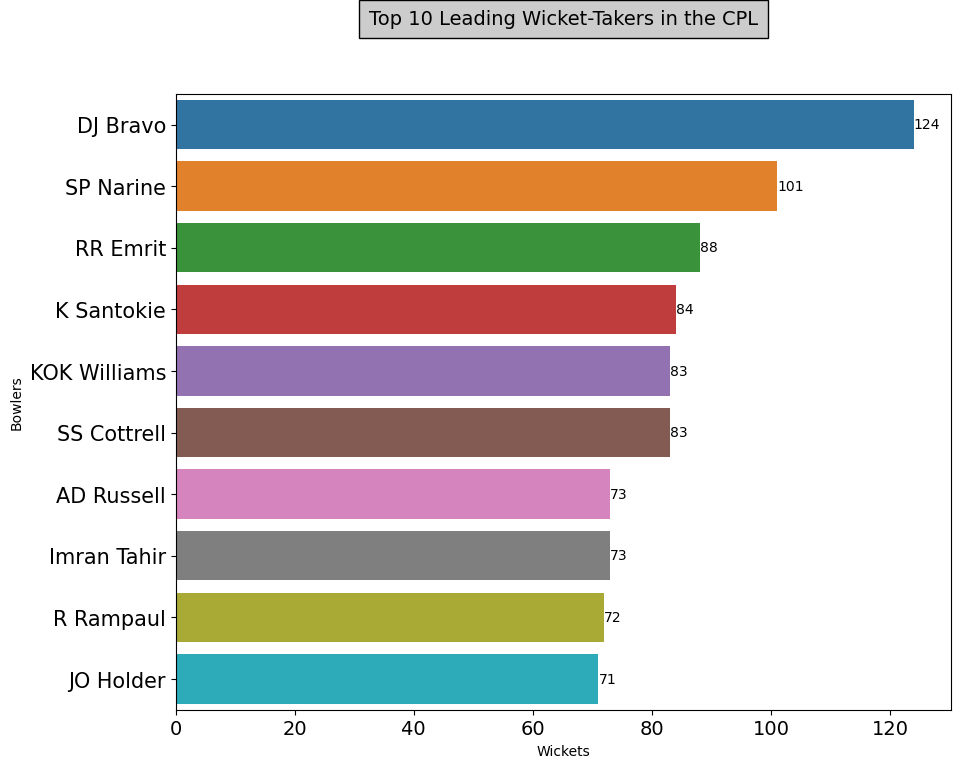

In [116]:
#Top 10 Leading Wicket-Takers in the CPL
#List of dismissals which aren't credited to bowler
no_cred_wickets = 'obstructing the field, retired hurt, No wicket, run out'

#Get Data Set where if a bowler takes on a wicket on a ball; there is a True in that row
bw = df[df['wicket_type'].apply(lambda x: True if x not in no_cred_wickets else False)]

#produce series of bowlers and total wickets taken
#bw['bowler'] produces a series with bowlers names where the condition above evaluated True
#value_counts: counts all unique values
#Note: by default series is in descending order so no need to sort

bw = bw['bowler'].value_counts()[:10]

plt.figure(figsize=(10,8))

plt.title("Top 10 Leading Wicket-Takers in the CPL", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart11 = sns.barplot(y=bw.index,x=bw,orient='h')

bar_chart11.bar_label(bar_chart11.containers[0])

#Label Axes
plt.xlabel('Wickets')
plt.ylabel('Bowlers')
plt.show()


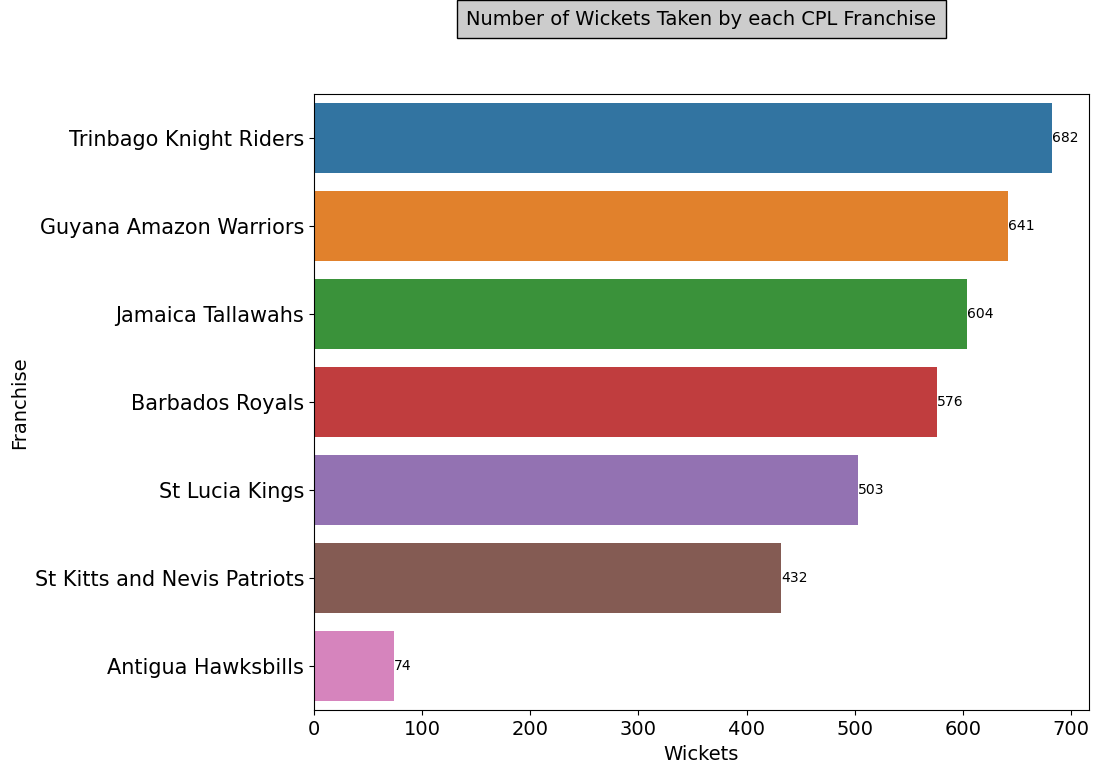

In [117]:
#Number of Wickets Taken by each CPL Franchise

#List of dismissals which aren't credited to bowler
no_cred_wickets = 'obstructing the field, retired hurt, No wicket, run out'

#Get Data Set where if a bowler takes on a wicket on a ball; there is a True in that row
num_wickets = df[df['wicket_type'].apply(lambda x: True if x not in no_cred_wickets else False)]

#produce series of bowlers and total wickets taken
#bw['bowler'] produces a series with bowlers names where the condition above evaluated True
#value_counts: counts all unique values
#Note: by default series is in descending order so no need to sort

num_wickets = num_wickets['bowling_team'].value_counts()[:10]

plt.figure(figsize=(10,8))

plt.title("Number of Wickets Taken by each CPL Franchise", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart12 = sns.barplot(y=num_wickets.index,x=num_wickets,orient='h')

bar_chart12.bar_label(bar_chart12.containers[0])

#Label Axes
plt.xlabel('Wickets', fontsize=14)
plt.ylabel('Franchise', fontsize=14)
plt.show()

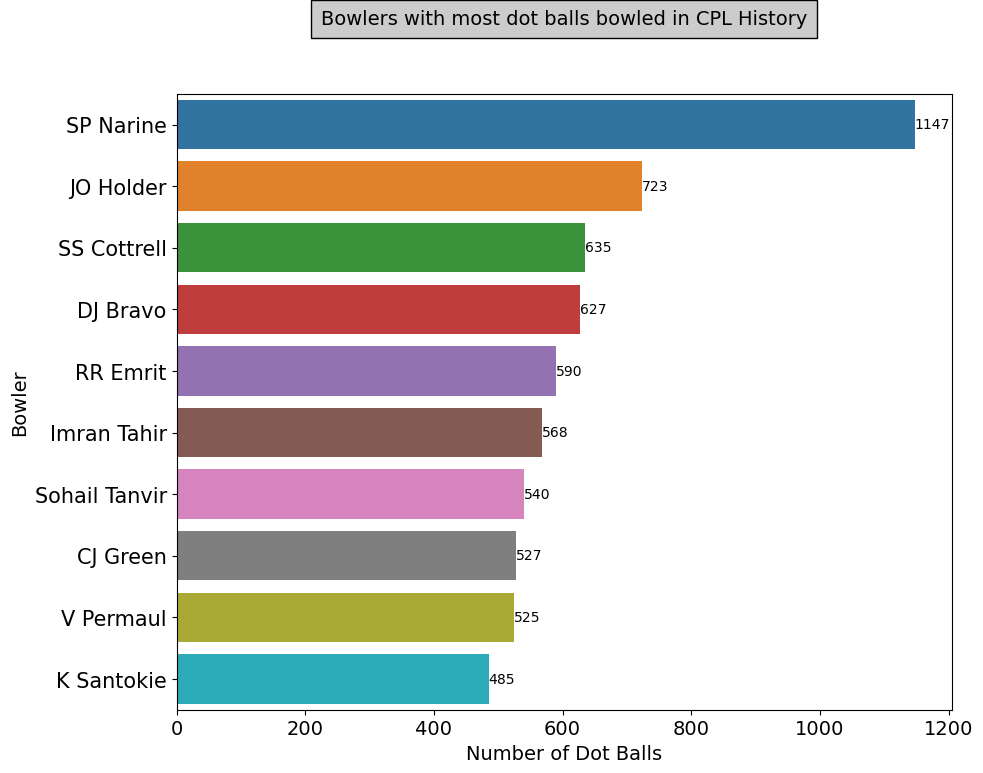

In [118]:
#Bowlers with most dot balls

#Get Data Set of number of dots per bowler, grouped by bowler 
#All columms will have number of  dots bowled after running the count method so we can select from any at end
num_dots = df[df['runs_per_ball'] == 0].groupby('bowler').count()['runs_per_ball']

#Sort in descending order and pull top 10
num_dots = num_dots.sort_values(ascending=False)[:10]

plt.figure(figsize=(10,8))

plt.title("Bowlers with most dot balls bowled in CPL History", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart14 = sns.barplot(y=num_dots.index,x=num_dots,orient='h')

bar_chart14.bar_label(bar_chart14.containers[0])

#Label Axes
plt.xlabel('Number of Dot Balls', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.show()


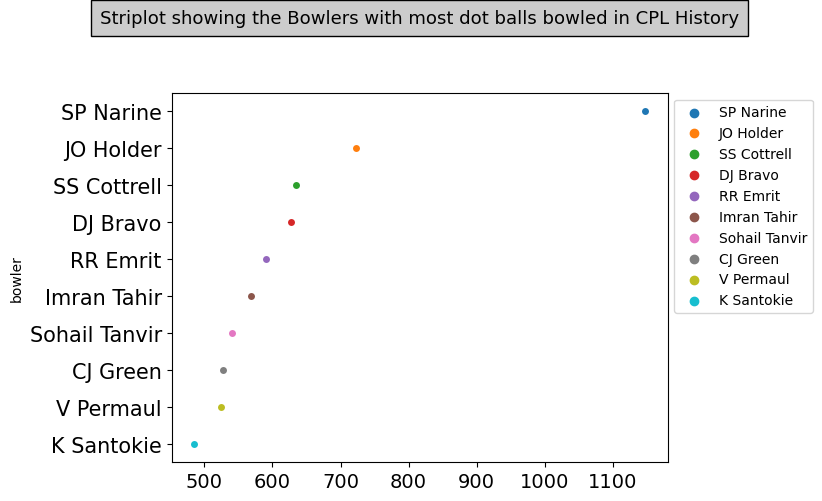

In [119]:
#Bowlers with most dot balls
#Striplot showing the Bowlers with most wickets each CPL season
plt.title("Striplot showing the Bowlers with most dot balls bowled in CPL History", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

stripplot5 = sns.stripplot(y=num_dots.index ,x=num_dots.values, hue=num_dots.index,jitter=True, data=num_dots)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

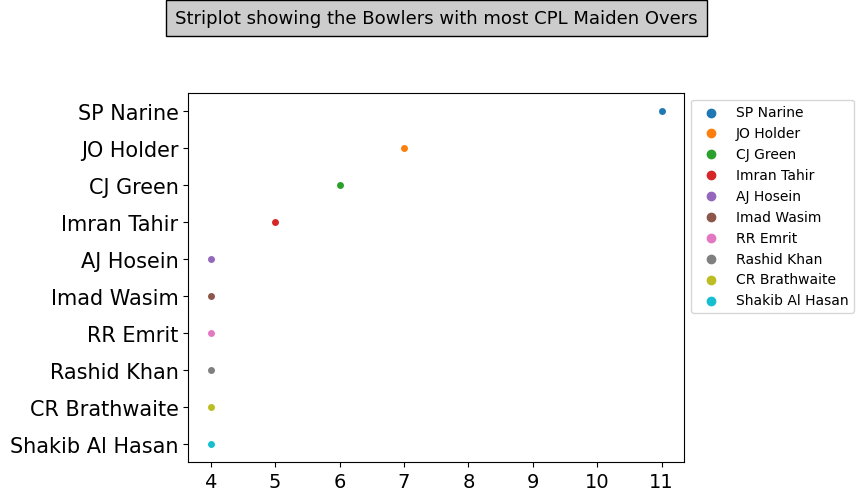

In [120]:
#Bowlers with most CPL Maiden Overs
#Get dataframe  grouped by matches and bowlers showing the number of runs conceded
#in each over bowled by every bowler in that particular match.
#startdate:bowler:overs:runs in over
over_runs = df.groupby(['start_date','bowler','overs'])['runs_per_ball'].sum()

#filter all maiden overs:
over_runs = over_runs[over_runs.values == 0]

#Drop start date and overs: so datafeame will look like bowler:runs per over (always 0)
over_runs = over_runs.droplevel(level=[0,2])

#Now sum all maidens for each bowler
maidens = over_runs.index.value_counts()[:10]

plt.title("Striplot showing the Bowlers with most CPL Maiden Overs", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

stripplot6 = sns.stripplot(y=maidens.index ,x=maidens.values, hue=maidens.index,jitter=True, data=maidens)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

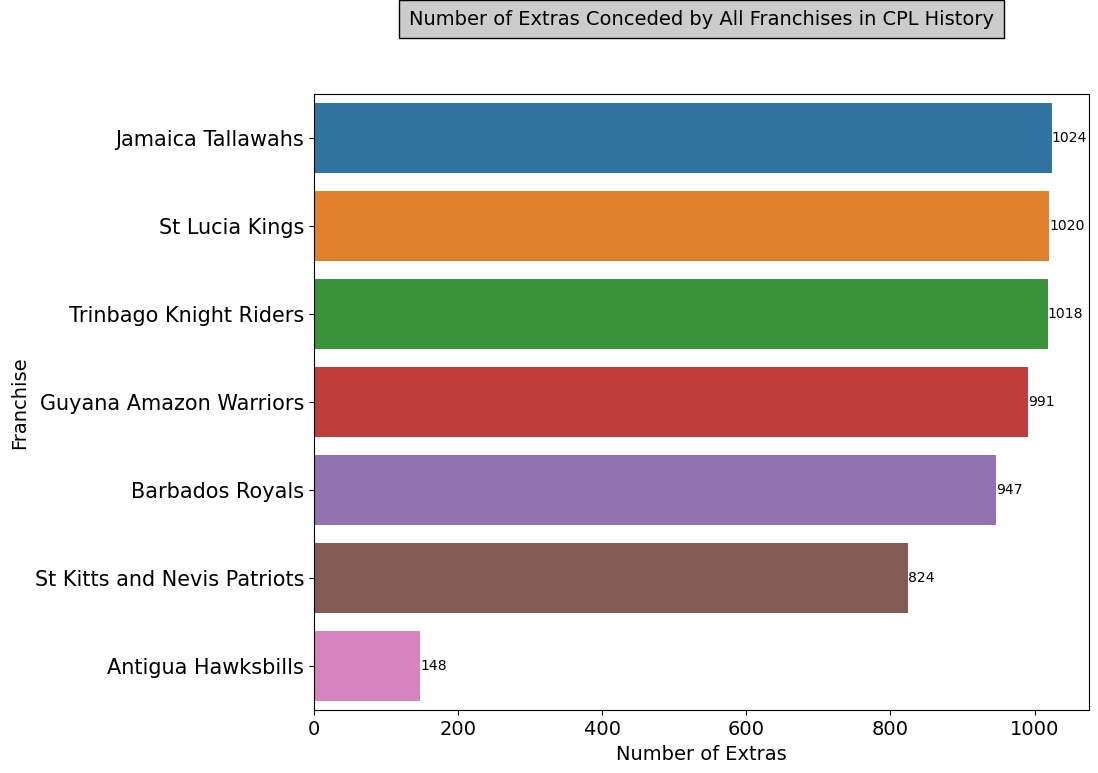

In [121]:
#Number of Extras Conceded by All Franchises in CPL History

#Group Data Set by Bowling Team and sum extras given by Bowling Team. 
num_extras = df.groupby(['bowling_team'])['extras'].agg('sum')

#Sort in Descending Order
num_extras = num_extras.sort_values(ascending=False)

plt.figure(figsize=(10,8))

plt.title("Number of Extras Conceded by All Franchises in CPL History", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart15 = sns.barplot(y=num_extras.index,x=num_extras,orient='h')

bar_chart15.bar_label(bar_chart15.containers[0])

#Label Axes
plt.xlabel('Number of Extras', fontsize=14)
plt.ylabel('Franchise', fontsize=14)
plt.show()

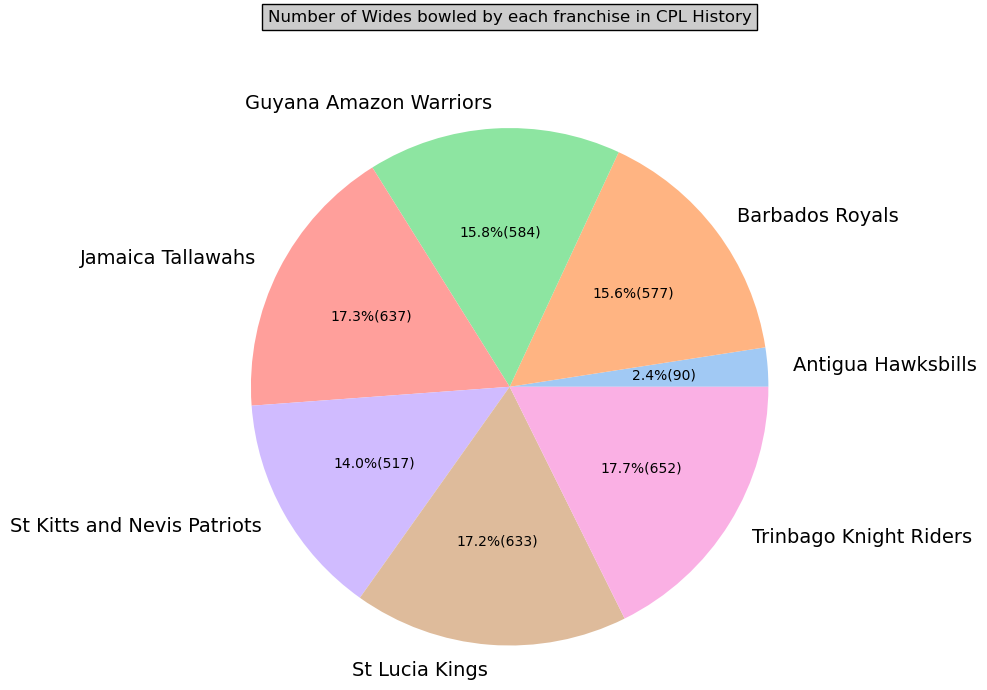

In [122]:
#Extras: Number of Wides Conceded by All Franchises in CPL History

#Group Data Set by Bowling Team and wides given by Bowling Team. 
num_wides = df.groupby(['bowling_team'])['wides'].agg('sum')

plt.title("Number of Wides bowled by each franchise in CPL History", bbox={'facecolor':'0.8'}, y = 1.3, fontsize=12)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
piechart3 = plt.pie(num_wides, labels=num_wides.index, colors=palette_color, \
        autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*num_wides.sum()), radius = 1.75)
  
# displaying chart
plt.show()

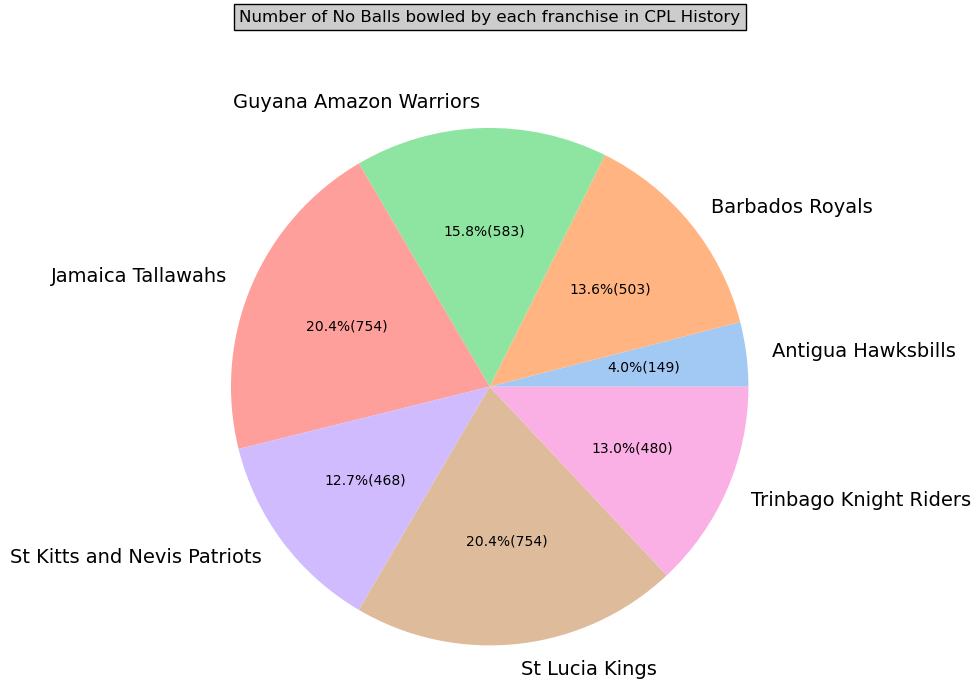

In [123]:
#Extras: No Balls Conceded by All Franchises in CPL History
num_noballs = df.groupby(['bowling_team'])['noballs'].agg('sum')

plt.title("Number of No Balls bowled by each franchise in CPL History", bbox={'facecolor':'0.8'}, y = 1.3, fontsize=12)

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
piechart4 = plt.pie(num_noballs, labels=num_noballs.index, colors=palette_color, \
        autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*num_wides.sum()), radius = 1.75)
  
# displaying chart
plt.show()

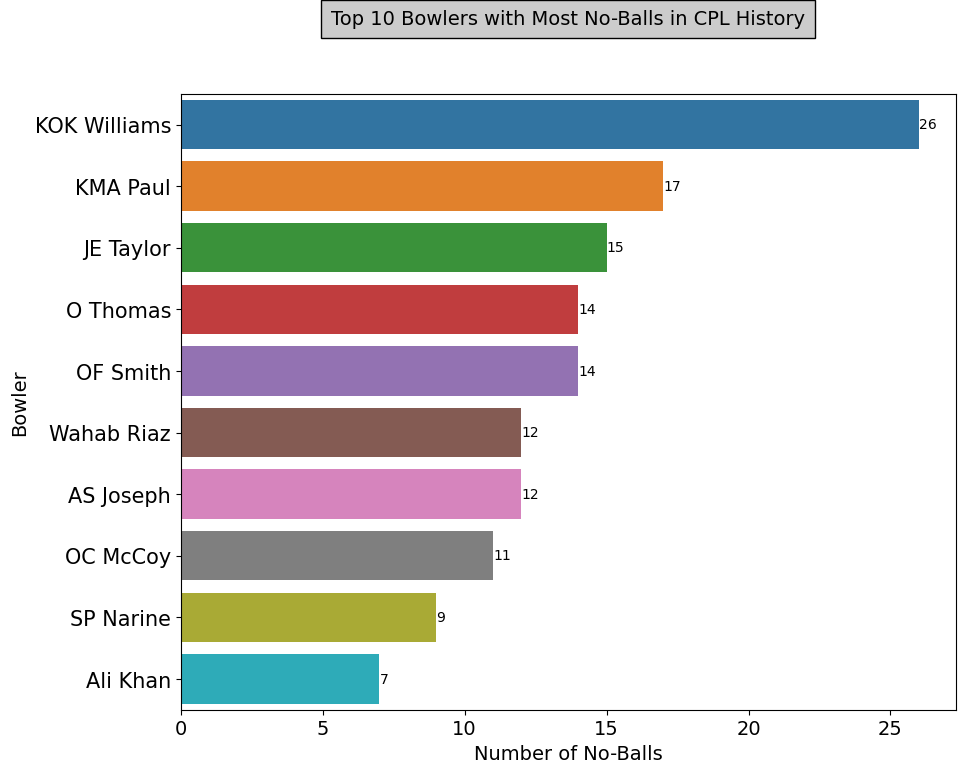

In [124]:
#Top 10 Bowlers with Most No-Balls in CPL History

#Get All bowlers who bowled no balls
num_no_balls = df[df['noballs'] != 0]['bowler']

#Count Top 10 no ball bowlers
no_ball_top_10 = num_no_balls.value_counts()[:10]

plt.figure(figsize=(10,8))

plt.title("Top 10 Bowlers with Most No-Balls in CPL History", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart16 = sns.barplot(y=no_ball_top_10.index,x=no_ball_top_10 ,orient='h')

bar_chart16.bar_label(bar_chart16.containers[0])

#Label Axes
plt.xlabel('Number of No-Balls', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.show()

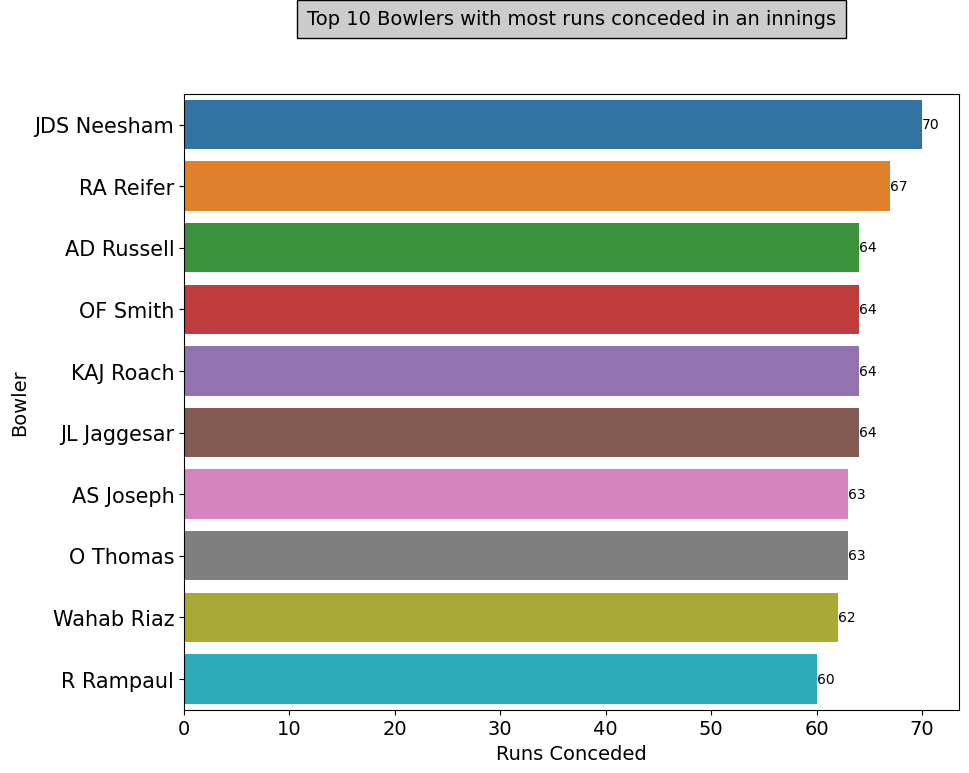

bowler
JDS Neesham    70
RA Reifer      67
AD Russell     64
OF Smith       64
KAJ Roach      64
JL Jaggesar    64
AS Joseph      63
O Thomas       63
Wahab Riaz     62
R Rampaul      60
Name: runs_per_ball, dtype: int64


In [125]:
#Bowlers with most runs conceded in an innings

#Get Data Set of bowler: match date: runs conceded in matc
runs_conceded_date = df.groupby(['bowler','start_date'])['runs_per_ball'].sum()

#Drop Match date:
runs_conceded = runs_conceded_date.droplevel(level=1)

#Sort in Descending Order
runs_conceded = runs_conceded.sort_values(ascending=False)[:10]

plt.figure(figsize=(10,8))

plt.title("Top 10 Bowlers with most runs conceded in an innings", bbox={'facecolor':'0.8', 'pad':6}, fontsize=14)

bar_chart17 = sns.barplot(y=runs_conceded.index,x=runs_conceded,orient='h')

bar_chart17.bar_label(bar_chart17.containers[0])

#Label Axes
plt.xlabel('Runs Conceded', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.show()

#Pivot Table
print(runs_conceded.sort_values(ascending=False)[:10])

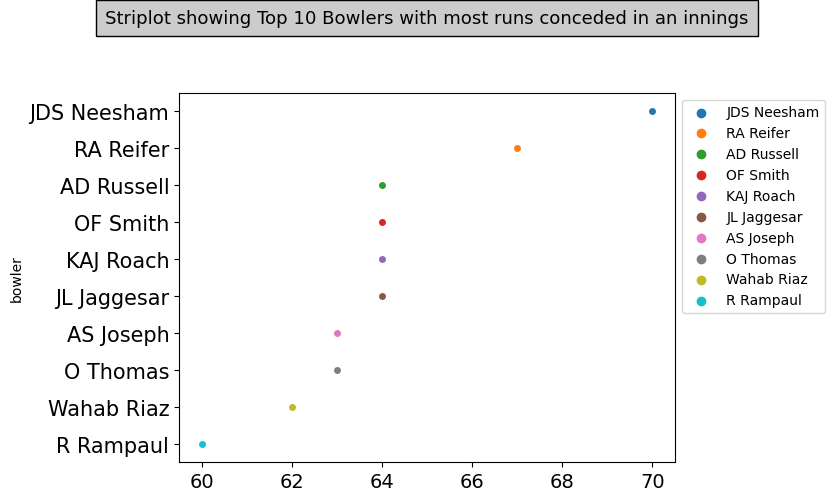

In [126]:
#Bowlers with most runs conceded in an innings
#Strip Plot 
plt.title("Striplot showing Top 10 Bowlers with most runs conceded in an innings", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

stripplot8 = sns.stripplot(y=runs_conceded.index ,x=runs_conceded.values, hue=runs_conceded.index,jitter=True, data=runs_conceded)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()